# Problem Set 1 CS129.18

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What is the dimensionality or shape of the data? ( 1pt )

2. What is mean temperature for the year 2017? ( 3pts )

3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

7. Identify if the model is a good model and why. ( 3pts )

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/PH_Weather_v1.csv")

In [3]:
df.head()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88


### 1. What is the dimensionality or shape of the data?

In [14]:
df.shape

(90565, 11)

In [18]:
df.dtypes

datetime                int64
wind_direction          int64
wind_speed              int64
gust_speed            float64
sea_level_pressure    float64
temperature             int64
altitude              float64
precipitation         float64
clouds                 object
visibility            float64
humidity              float64
dtype: object

In [4]:
list(df['altitude'].unique())

[nan]

In [13]:
list(df['precipitation'].unique())

[nan, 0.04, 1.14, 0.87, 0.35, 0.28, 0.08, 0.24]

In [12]:
df['precipitation'].value_counts()

0.04    6
0.28    2
0.08    1
1.14    1
0.35    1
0.24    1
0.87    1
Name: precipitation, dtype: int64

In [7]:
df.isna().sum()

datetime                  0
wind_direction            0
wind_speed                0
gust_speed            90564
sea_level_pressure        0
temperature               0
altitude              90565
precipitation         90552
clouds                    0
visibility                0
humidity                  0
dtype: int64

In [6]:
df.corr(method ='pearson')

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,visibility,humidity
datetime,1.000000,0.065113,0.001526,NaN,0.061432,0.038553,NaN,-0.195087,0.164154,0.044368
wind_direction,0.065113,1.000000,0.221674,NaN,0.000481,0.080940,NaN,-0.480181,-0.075325,0.045584
wind_speed,0.001526,0.221674,1.000000,NaN,-0.025783,0.286988,NaN,-0.058078,0.071636,-0.159945
gust_speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sea_level_pressure,0.061432,0.000481,-0.025783,NaN,1.000000,-0.001232,NaN,0.021585,-0.010930,-0.011421
temperature,0.038553,0.080940,0.286988,NaN,-0.001232,1.000000,NaN,-0.256197,0.246923,-0.646611
altitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precipitation,-0.195087,-0.480181,-0.058078,NaN,0.021585,-0.256197,NaN,1.000000,-0.519037,0.596638
visibility,0.164154,-0.075325,0.071636,NaN,-0.010930,0.246923,NaN,-0.519037,1.000000,-0.193111
humidity,0.044368,0.045584,-0.159945,NaN,-0.011421,-0.646611,NaN,0.596638,-0.193111,1.000000


### 2. What is mean temperature for the year 2017? 

In [14]:
df_2017 = df[(df['datetime'] >= 201700000000) & (df['datetime'] < 201800000000)]
df_2017.tail()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
88634,201712310900,70,9,NaN,1009.6,28,NaN,NaN,BKN,7.5,0.49
88635,201712311200,40,4,NaN,1011.5,26,NaN,NaN,BKN,7.5,0.66
88636,201712311500,0,0,NaN,1011.5,26,NaN,NaN,BKN,7.5,0.66
88637,201712311800,0,0,NaN,1010.7,25,NaN,NaN,BKN,7.5,0.72
88638,201712312100,20,2,NaN,1010.2,24,NaN,NaN,BKN,7.5,0.69


In [19]:
df_2017.shape

(2896, 11)

In [17]:
mean = df_2017['temperature'].mean()
print(f'The mean temperature for 2017 is {mean} Celsius degrees.')

The mean temperature for 2017 is 27.93335635359116 Celsius degrees.


### 3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature.

In [36]:
df_temperature = df[['sea_level_pressure', 'wind_speed', 'humidity', 'temperature']].dropna()
df_temperature.isnull().values.any()

False

In [37]:
df_temperature

,sea_level_pressure,wind_speed,humidity,temperature
0,1007.7,2,0.75,30
1,1011.3,0,0.94,26
2,1004.1,9,0.80,26
3,1006.3,21,0.80,26
4,1010.1,0,0.88,26
...,...,...,...,...
90560,1007.0,0,0.80,28
90561,1008.1,4,0.86,28
90562,1008.9,4,0.80,27
90563,1007.9,7,0.77,27


In [38]:
from sklearn.linear_model import LinearRegression

X = df_temperature.drop("temperature", axis=1)
X.head()

,sea_level_pressure,wind_speed,humidity
0,1007.7,2,0.75
1,1011.3,0,0.94
2,1004.1,9,0.80
3,1006.3,21,0.80
4,1010.1,0,0.88


In [39]:
linear_model = LinearRegression()
linear_model.fit(X, df_temperature["temperature"])

LinearRegression()

In [40]:
print(f"Coefficient values: {linear_model.coef_}")

Coefficient values: [-1.01810583e-04  9.96129303e-02 -1.11658163e+01]


In [41]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_)))

,0,1
0,sea_level_pressure,-0.000102
1,wind_speed,0.099613
2,humidity,-11.165816


### 4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot).

Text(0.5, 1.0, 'Relationship between Humidity and Temperature')

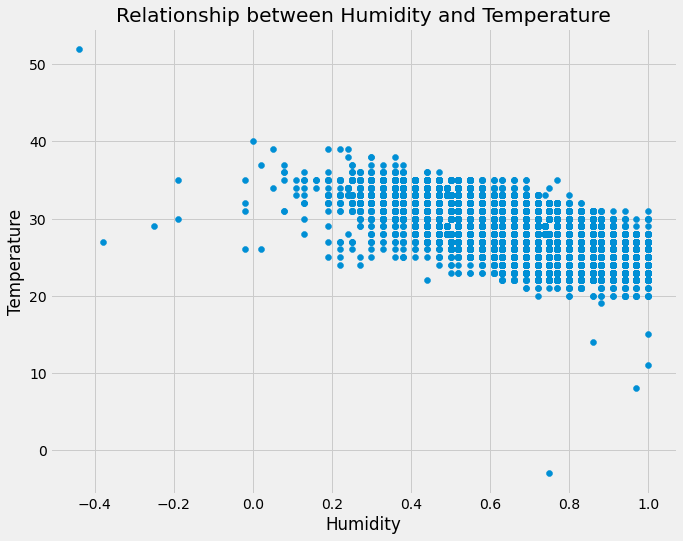

In [47]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(df_temperature["humidity"], df_temperature["temperature"])
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Relationship between Humidity and Temperature")

### 5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature.

In [43]:
predictions = linear_model.predict(X)
df_temperature["PRED"] = predictions
df_temperature[["humidity", "temperature", "PRED"]].head()

,humidity,temperature,PRED
0,0.75,30,27.507489
1,0.94,26,25.186392
2,0.80,26,27.646856
3,0.80,26,28.841987
4,0.88,26,25.856463


In [44]:
import math
mean_squared_error = np.mean((df["temperature"] - linear_model.predict(X))**2)
math.sqrt(mean_squared_error)

1.6951043765673073

### 6.Solve for the R^2 score of the linear model used to predict temperature.

In [45]:
linear_model.score(X, df_temperature["temperature"])

0.45269800134412286

### 7. Identify if the model is a good model and why.

Based on the R^2 score, the model is an acceptable but not that great model. A good model would have a higher R^2 score like 0.75 and up. However, since the data is dealing with weather phenomena which is uncontrollable and complex, the R^2 is still acceptable in predicting temperature. Improvements can be made by adding new data columns.